# TIPS DATASET


This note book contains the analysis and descriptions/plots for the Tip Dataset

https://github.com/mwaskom/seaborn-data/blob/master/tips.csv


# INTRODUCTION

Traditionarily (rather, customarily), a tip a voluntary gift (money - £, $ or Euro) offered by satisfied customers in restuarants to the waiter and given along with the service bill. It is commonly expected that the tip amount would not only reflect the customer's satifaction, but also be a portion(or roughly so) of the total bill paid. The tips dataset portrays the tip given and recorded by restuarant worker over the course of week (or so).

The dataset contain 244 data observations, organised in an array - data attribute in columns and observations in rows.Further categorization provides descriptions such as sex, smoker, day of the week, time etc.

# QUEST

Is there a linear relationship between the amount of tip given and the total bill paid in the instances

# Setting up and importation of Analytics packages


In [2]:
# The numpay package
import numpy as np
# The pandas package 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [3]:
import pandas as pd

# APPRECIATING SOME PLOTS IN SEABORN


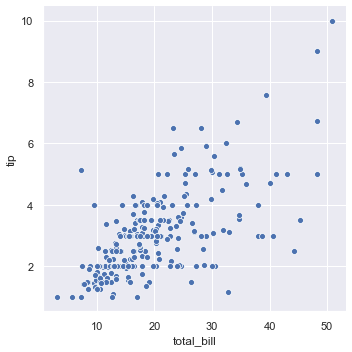

In [4]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

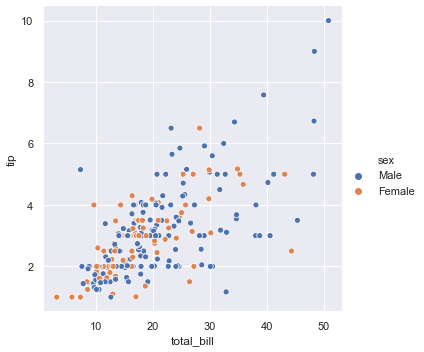

In [3]:
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips);

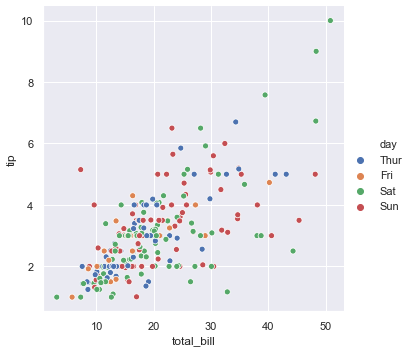

In [4]:
sns.relplot(x="total_bill", y="tip", hue="day", data=tips);

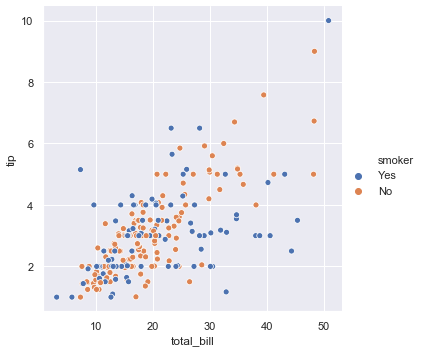

In [5]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

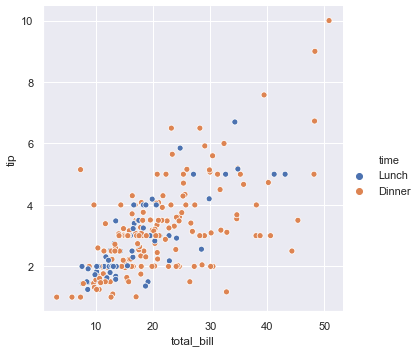

In [5]:
sns.relplot(x="total_bill", y="tip", hue="time", data=tips);

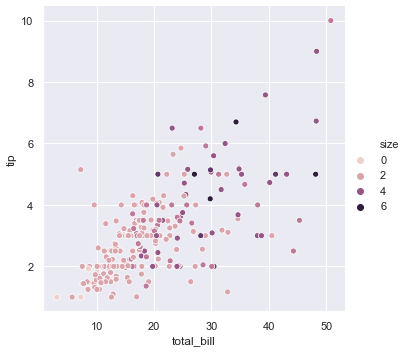

In [7]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

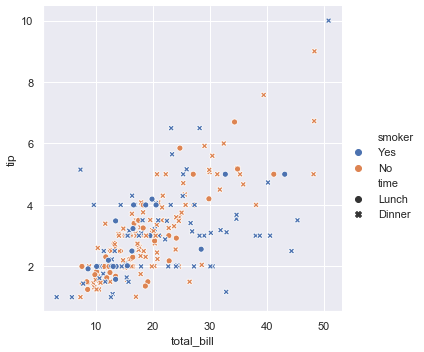

In [8]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

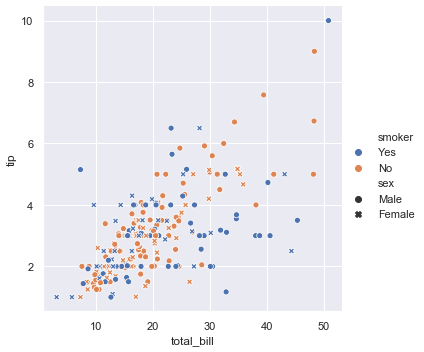

In [9]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="sex", data=tips);

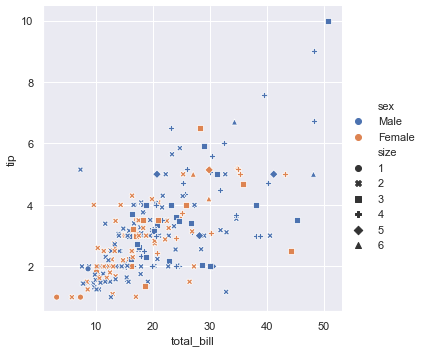

In [10]:
sns.relplot(x="total_bill", y="tip", hue="sex", style="size", data=tips);

# Data integrity Review

As expected, it is a good idea check for data integrity i.e. whether data is corrupted or has cell that are empty. Panda function 'info()' will confirm is there is any 'null' value.

In [6]:
tips.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


There is no evidence of 'empty cell' in any columns within the dataset.


In order to appreciate the dataset structure, columns and dta, we will displaye the first four rows in a dataframe

In [7]:
tips.head(4)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


Below is also a display the last four rows in a dataframe

In [8]:
tips.tail(4)

,total_bill,tip,sex,smoker,day,time,size
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


# Modelling the raw Data

We shall creat new attributes within the dataset to enable us portray and evaluate the relationship between the data. In this case, we shall look at:
1. Sum of tip and total bill, and the ratio of the tip to sum of bill and tip
2. Value of total bill divided by the size of the party
3. Value of tip per person

In [68]:
# new column created - sum of total bill and tip
tips["sum"] = tips["total_bill"]+tips["tip"] # appended at the end of the array

# new column created - ratio of tip to sum
tips["percent"] = round(tips["tip"]/tips["sum"]*100, 2)

# add column: bpp - bill per person
tips["bpp"] = tips["total_bill"]/tips["size"]

# add column: tpp - tip per person
tips["tpp"] = tips["tip"]/tips["size"]

tips["tip_ratio"] = tips["tip"]/tips["total_bill"]

The discription keeps the percentile limited to 50%, i.e. keeping all the limits bounded lie within fixed distance of each other.

In [69]:
tips.describe(percentiles = [0.5])

,total_bill,tip,size,sum,tip_ratio,bpp,tpp,ratio_smoke,ratio_puff,percent
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.00000,244.000000,93.000000,93.000000,244.000000
mean,19.785943,2.998279,2.569672,22.784221,0.160803,7.88823,1.212762,0.163196,0.163196,13.643320
std,8.902412,1.383638,0.951100,9.890116,0.061072,2.91435,0.491705,0.085119,0.085119,4.058544
min,3.070000,1.000000,1.000000,4.070000,0.035638,2.87500,0.400000,0.035638,0.035638,3.440000
50%,17.795000,2.900000,2.000000,20.600000,0.154770,7.25500,1.107500,0.153846,0.153846,13.405000
max,50.810000,10.000000,6.000000,60.810000,0.710345,20.27500,3.333333,0.710345,0.710345,41.530000


From the above decriptive table, we can observe that:
1. The dataset has an average ratio of tip to total bill of 13.64%
2. The average total bill apportioned uniformly in the party stands at 7.89
3. The average tip per person stands at 1.21


A view of the dataset array (Head) displayed with additional characteristics 

In [65]:
tips.head(4)

,total_bill,tip,sex,smoker,day,time,size,sum,tip_ratio,bpp,tpp,ratio_smoke,ratio_puff
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00,0.059447,8.495000,0.505000,NaN,NaN
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00,0.160542,3.446667,0.553333,NaN,NaN
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51,0.166587,7.003333,1.166667,NaN,NaN
3,23.68,3.31,Male,No,Sun,Dinner,2,26.99,0.139780,11.840000,1.655000,NaN,NaN


A view of the dataset array (Tail) displayed with additional characteristics

In [66]:
tips.tail(5)

,total_bill,tip,sex,smoker,day,time,size,sum,tip_ratio,bpp,tpp,ratio_smoke,ratio_puff
239,29.03,5.92,Male,No,Sat,Dinner,3,34.95,0.203927,9.676667,1.973333,NaN,NaN
240,27.18,2.00,Female,Yes,Sat,Dinner,2,29.18,0.073584,13.590000,1.000000,0.073584,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,24.67,0.088222,11.335000,1.000000,0.088222,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,19.57,0.098204,8.910000,0.875000,NaN,NaN
243,18.78,3.00,Female,No,Thur,Dinner,2,21.78,0.159744,9.390000,1.500000,NaN,NaN


In [27]:
print("Average tip per smoking person:", tips[tips["smoker"] == "Yes"]["tpp"].mean()) 


print("Average total bill among smokers: ", tips[tips["smoker"] == "Yes"]["total_bill"].mean())


tips["ratio_puff"] = tips[tips["smoker"] == "Yes"]["tip"]/tips[tips["smoker"] == "Yes"]["total_bill"]


print("Average ratio tip to total bill among smokers: ", tips["ratio_puff"] .mean())
                                                              





Average tip per smoking person: 1.2977956989247312
Average total bill among smokers:  20.756344086021507
Average ratio tip to total bill among smokers:  0.1631960446368779


This analysis may seem controversial, but figures dont lie. The total bill among 'puffers' is higher than the average i.e. they spend at the restuarant.

The figures also indicate that 'puffers' also appear to be more generous (they offer more tips then non-smokers) based on the average ratio of tip/total bill which stands at 16.32%. (as against 15.15% for non-smokers)






guided by references to : https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

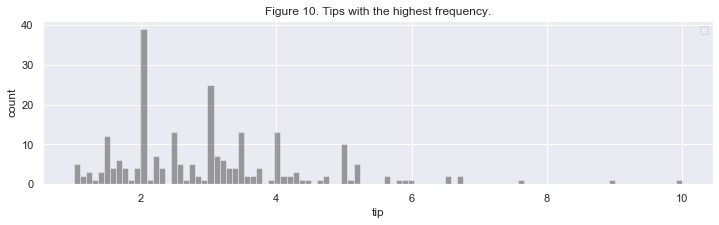

In [73]:
plt.subplots(figsize=(12,3))
plt.legend(prop={'size':10})
plt.title('Figure 10. Tips with the highest frequency.')
plt.xlabel('tip')
plt.ylabel('count')
 
sns.distplot(tips['tip'], bins=100, kde=False, label="tip", color="k")
plt.show

The table indicates that the Tips value with the highest frequency is '2'. This is closely followed by '3'. st frequent 

In [29]:
sns.set_style("darkgrid")
sns.set_palette("muted")

# Using A Bar Plot





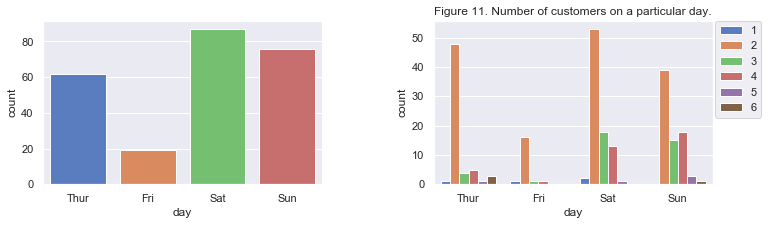

In [72]:

fig, ax = plt.subplots(ncols=2, figsize=(12,3))
#sns,set(rc={'figure.figsize': (12,3)])} # plot 

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.4, hspace=None)

plt.title('Figure 11. Number of customers on a particular day.')

sns.countplot(data=tips, x="day", ax=ax[0])
sns.countplot(data=tips, x="day", hue='size', ax=ax[1])
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

              

The Barplot above illustrates the data in categories, and split into days that the restaurant was in operation. It indicated that the maximum amount of tips were given on a Saturday. Since the amount of tips given is directly proportional to the total bill amount, it pre-surposes that the highest volume of sales was recorded on Saturday. This volume is closely followed by the sales volume for Thursday.

# REGRESSION 

This the measure of the relation between the mean value of one variable (e.g. output) and corresponding values of other variables . Regression analysis can be used to infer causal relationships between the independent and dependent variables in a fixed dataset.

Seaborn built-in functionality

We will deploy the Seaborn regplot, to attemtp to caste a linear regression line. This is referenced to the Seaborn Tutorial/.

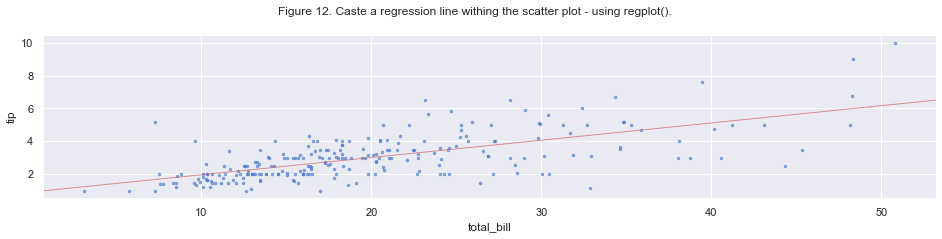

In [71]:
fig, ax = plt.subplots(figsize=(16,3))
plt.suptitle("Figure 12. Caste a regression line within the scatter plot - using regplot().", x=0.5, y=1.01, fontsize=12)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)

sns.regplot(data=tips, x="total_bill", y="tip", ci=0, scatter_kws={"s": 6, "alpha":0.6}, line_kws={"lw":1, "color":"r", "alpha":0.6}) # confidence interval set to 0 for clarity
plt.show()

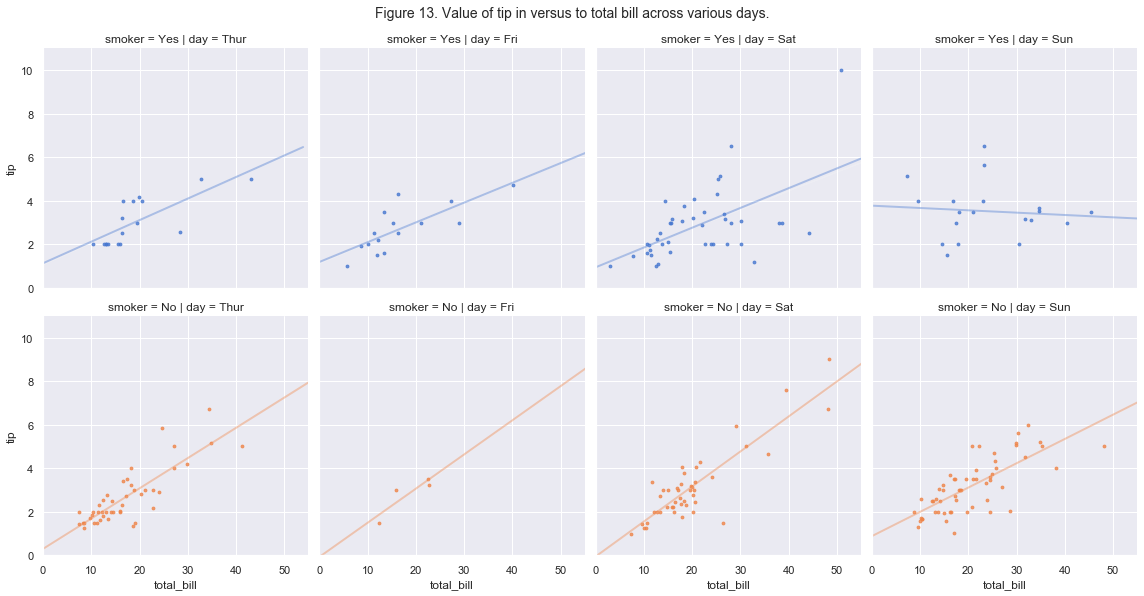

In [80]:
lm = sns.lmplot(data=tips, x="total_bill", y="tip", col="day", row="smoker", hue="smoker", ci=0, height=4, aspect=1, palette="muted", scatter_kws={"s":8}, line_kws={"lw":2, "alpha":0.4})

# plot's title
plt.suptitle("Figure 13. Value of tip in versus to total bill across various days.", x=0.5, y=1.03, fontsize=14)

# axes limits
axes = lm.axes
axes[0,0].set_ylim(0,11)
axes[0,0].set_xlim(0,55)

plt.show()


# referenced to :https://stackoverflow.com/questions/25212986/how-to-set-some-xlim-and-ylim-in-seaborn-lmplot-facetgrid/25213438#25213438


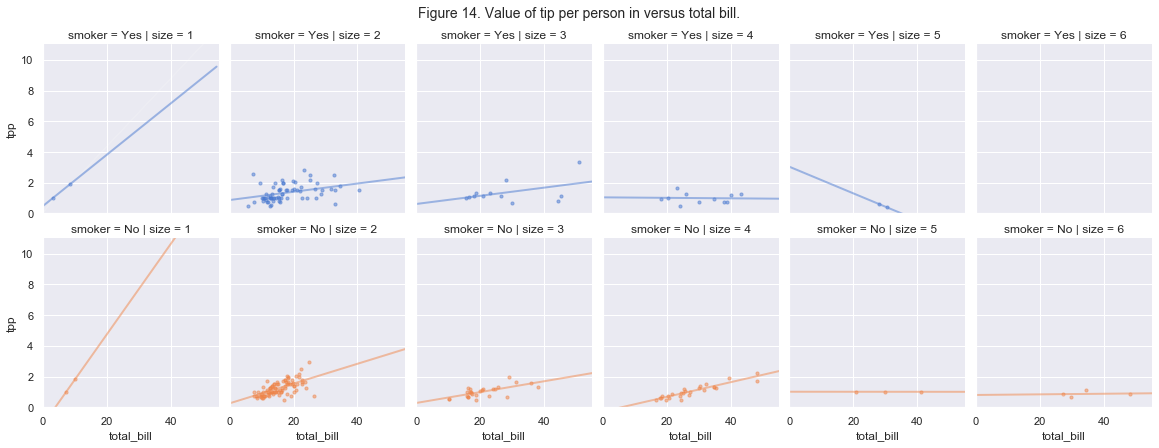

In [78]:
lm = sns.lmplot(data=tips, x="total_bill", y="tpp", col="size", row="smoker", hue="smoker", ci=0, height=3, aspect=.9, palette="muted", scatter_kws={"s":10, "alpha":0.5}, line_kws={"lw":2, "alpha":0.5})

# plot's title
plt.suptitle("Figure 14. Value of tip per person in versus total bill.", x=0.5, y=1.03, fontsize=14)

# setting axes limits 
axes = lm.axes
axes[0,0].set_ylim(0,11)
axes[0,0].set_xlim(0,55)

plt.show()

Relationship between tip percent versus total bill

The plot in figure 14 strongly suggest that there is a negative/inverse correlation between the two variables. The tip percent  is gradually reduced relative to the total bill, as the bill amount increases, as portryaed linear regression line figure (below).

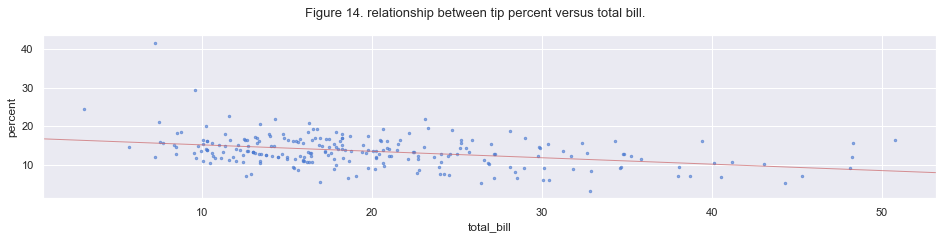

In [82]:
fig, ax = plt.subplots(figsize=(16,3))
plt.suptitle("Figure 14. relationship between tip percent versus total bill.", x=0.5, y=1.01, fontsize=13)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)

sns.regplot(data=tips, x="total_bill", y="percent", ci=0, scatter_kws={"s": 6, "alpha":0.6}, line_kws={"lw":1, "color":"r", "alpha":0.6}) # confidence interval set to 0 for clarity
plt.show()

# CONCLUSION


In conclusion, we can made the following inferences: 
1. A direct linear relationship between the tip amount and the amount total bill across the entire dataset.
2. The average the tip offerred by customers was 13.64% of the amount of total bill
3. There was an overall decrease in the ration as the value of total bill increase in the dataset.
4. The smoker were more liberal in their tips in relation to total bill, even though they we fewer in absolute numbers
